# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/soma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Read the api key environment variable**

In [3]:
load_dotenv()

True

**Create a newsapi client**

To get access of all the latest articles about cryptocurrencies, we need to call `NewsApiClient` by passing `NEWS_API_KEY`.

In [5]:
newsapi = NewsApiClient(api_key=os.getenv("NEWS_API_KEY"))

**Fetch the `Bitcoin` and `Ethereum` news articles from newsapi.org by using `get_everything` function**

`get_everything` returns articles from large and small news sources and blogs.

In [6]:
btc_news_articles = newsapi.get_everything(
    q="bitcoin AND BTC", 
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [7]:
eth_news_articles = newsapi.get_everything(
    q="ethereum AND ETH", 
    language="en",
    page_size=100,
    sort_by="relevancy"
)

**Define sentiment dataframe function which is used to create `Bitcoin` and `Ethereum` sentiment scores**

In [8]:
def get_sentiments_df(articles):
    # Create the sentiment scores DataFrame
    sentiments = []
    for article in articles["articles"]:
        try:
            text = article["description"]
            date = article["publishedAt"][:20]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu

            })

        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    
    # Reorder DataFrame columns
    cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
    df = df[cols]
    
    return df

**Create `Bitcoin` and `Ethereum` sentiment scores DataFrame**

Here we use `get_sentiments_df` function by passing `btc_news_articles` argument for bitcoin news article and `eth_news_articles` argument for ethereum news article.

In [9]:
btc_df = get_sentiments_df(btc_news_articles)
btc_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.3400,0.091,0.000,0.909
1,2021-04-24T10:00:00Z,"With Bitcoin down more than 25%, we’re sure th...",0.1027,0.077,0.047,0.876
2,2021-04-28T13:03:54Z,Summary List PlacementBitcoin has been struggl...,0.3612,0.141,0.108,0.751
3,2021-05-06T20:47:15Z,"Andrew Yang’s relationship with Bradley Tusk, ...",0.1027,0.133,0.115,0.752
4,2021-05-05T13:15:40Z,Summary List PlacementBitcoin will become avai...,0.0000,0.000,0.000,1.000


In [10]:
eth_df = get_sentiments_df(eth_news_articles)
eth_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-05-03T18:08:48Z,"The creators behind CryptoPunks, one of the mo...",0.4754,0.075,0.0,0.925
1,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.3400,0.091,0.0,0.909
2,2021-05-09T12:30:00Z,Summary List PlacementBitcoin has long been th...,0.8098,0.180,0.0,0.820
3,2021-05-05T14:27:28Z,Summary List PlacementThe 27-year-old co-creat...,0.0000,0.000,0.0,1.000
4,2021-04-15T10:21:41Z,Summary List PlacementEther soared to an all-t...,0.4939,0.076,0.0,0.924


**Describe the `btc_df` and `eth_df` Sentiment**

The describe function gives a summary of statistics of the whole dataframe.

In [11]:
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.194571,0.099260,0.043970,0.856760
std,0.410357,0.095631,0.071599,0.112383
min,-0.836700,0.000000,0.000000,0.576000
25%,0.000000,0.000000,0.000000,0.766750
50%,0.202100,0.098500,0.000000,0.864000
75%,0.485175,0.156250,0.070500,0.960000
max,0.918600,0.424000,0.312000,1.000000


In [12]:
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.183556,0.081690,0.031780,0.88655
std,0.368087,0.094015,0.072327,0.11777
min,-0.919900,0.000000,0.000000,0.32300
25%,0.000000,0.000000,0.000000,0.82150
50%,0.051500,0.061000,0.000000,0.90700
75%,0.493900,0.130000,0.037000,1.00000
max,0.887600,0.413000,0.469000,1.00000


### Questions:
Use descriptive statistics to answer the following questions:

**Which coin had the highest mean positive score?**

Bitcoin(BTC) has the highest mean positive score of 0.099260

**Which coin had the highest compound score?**

Bitcoin(BTC) has the highest compound score of 0.918600

**Which coin had the highest positive score?**

Bitcoin(BTC) has the highest positive score of 0.424000

**Which coin had the highest negative score?**

Ethereum(BTC) has the highest negative score of 0.469000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, we will use NLTK and Python to tokenize the text for each coin. We will perform the following tasks to preprocess the text: 
- Lowercase each word.
- Remove Punctuation.
- Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

**Instantiate the lemmatizer**



In [17]:
lemmatizer = WordNetLemmatizer()

**Create a list of stopwords**

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Expand the default stopwords list if necessary**

In [19]:
exp_stop_words = [
    'This', 
    'said', 
    'ha', 
    'dont', 
    'youve', 
    'even', 
    'getty', 
    'images', 
    'via', 
    'char',
    'summary',
    'li',
    'ol',
    'list'
]

In [23]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + exp_stop_words)
    not_sw = [word for word in lem if word.lower() not in sw]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in not_sw]
    
    return tokens

In [24]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for text in btc_df['Text']:
    btc_tokens.append(tokenizer(text))
    
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.3400,0.091,0.000,0.909,"[venmo, jumping, aboard, cryptocurrency, bandw..."
1,2021-04-24T10:00:00Z,"With Bitcoin down more than 25%, we’re sure th...",0.1027,0.077,0.047,0.876,"[bitcoin, sure, bitcoin, crypto, btc, holder, ..."
2,2021-04-28T13:03:54Z,Summary List PlacementBitcoin has been struggl...,0.3612,0.141,0.108,0.751,"[placementbitcoin, struggling, tumbling, level..."
3,2021-05-06T20:47:15Z,"Andrew Yang’s relationship with Bradley Tusk, ...",0.1027,0.133,0.115,0.752,"[andrew, yang, relationship, bradley, tusk, te..."
4,2021-05-05T13:15:40Z,Summary List PlacementBitcoin will become avai...,0.0000,0.000,0.000,1.000,"[placementbitcoin, become, available, customer..."


In [16]:
# Create a new tokens column for Ethereum
eth_tokens = []

for text in eth_df['Text']:
    eth_tokens.append(tokenizer(text))
    
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,Tokens
0,2021-05-03T18:08:48Z,"The creators behind CryptoPunks, one of the mo...",0.4754,0.075,0.0,0.925,"[creator, behind, cryptopunks, one, popular, n..."
1,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...,0.3400,0.091,0.0,0.909,"[venmo, jumping, aboard, cryptocurrency, bandw..."
2,2021-05-09T12:30:00Z,Summary List PlacementBitcoin has long been th...,0.8098,0.180,0.0,0.820,"[placementbitcoin, long, dominant, cryptocurre..."
3,2021-05-05T14:27:28Z,Summary List PlacementThe 27-year-old co-creat...,0.0000,0.000,0.0,1.000,"[placementthe, year, old, co, creator, ethereu..."
4,2021-04-15T10:21:41Z,Summary List PlacementEther soared to an all-t...,0.4939,0.076,0.0,0.924,"[placementether, soared, time, high, thursday,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def ngrams_counts_top10(df, n):   
    coin_bigrams = []
    for tokens in df.Tokens:
        bigrams = ngrams(tokens, n)
        coin_bigrams.extend(bigrams)
    top_10 = dict(Counter(coin_bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [19]:
# Generate the Bitcoin N-grams where N=2
ngrams_counts_top10(btc_df, 2)

,bigram,count
0,"(elon, musk)",8
1,"(bitcoin, btc)",5
2,"(bitcoin, price)",5
3,"(last, week)",4
4,"(time, high)",4
5,"(market, cap)",3
6,"(crypto, asset)",3
7,"(bitcoin, ether)",3
8,"(digital, currency)",3
9,"(q, earnings)",3


In [20]:
# Generate the Ethereum N-grams where N=2
ngrams_counts_top10(eth_df, 2)

,bigram,count
0,"(time, high)",10
1,"(bitcoin, ethereum)",8
2,"(vitalik, buterin)",7
3,"(elon, musk)",6
4,"(digital, asset)",5
5,"(ether, price)",5
6,"(ethereum, dogecoin)",5
7,"(ethereum, blockchain)",4
8,"(market, cap)",4
9,"(year, old)",4


In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = []
for tokens in btc_df.Tokens:
    btc_tokens.extend(tokens) 
token_count(btc_tokens, 10)

[('bitcoin', 84),
 ('btc', 34),
 ('crypto', 27),
 ('cryptocurrency', 14),
 ('market', 14),
 ('price', 13),
 ('time', 10),
 ('asset', 10),
 ('tesla', 10),
 ('investor', 9)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
# Use token_count to get the top 10 words for Bitcoin
eth_tokens = []
for tokens in eth_df.Tokens:
    eth_tokens.extend(tokens) 
token_count(eth_tokens, 10)

[('ethereum', 65),
 ('bitcoin', 34),
 ('eth', 28),
 ('crypto', 21),
 ('cryptocurrency', 19),
 ('high', 19),
 ('dogecoin', 18),
 ('new', 17),
 ('ether', 16),
 ('time', 15)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [25]:
def generate_wordcloud(df):
    coin_tokens = []
    for tokens in df.Tokens:
        coin_tokens.extend(tokens)
    input_text = ' '.join(coin_tokens)
    wc = WordCloud().generate(input_text)
    plt.imshow(wc)

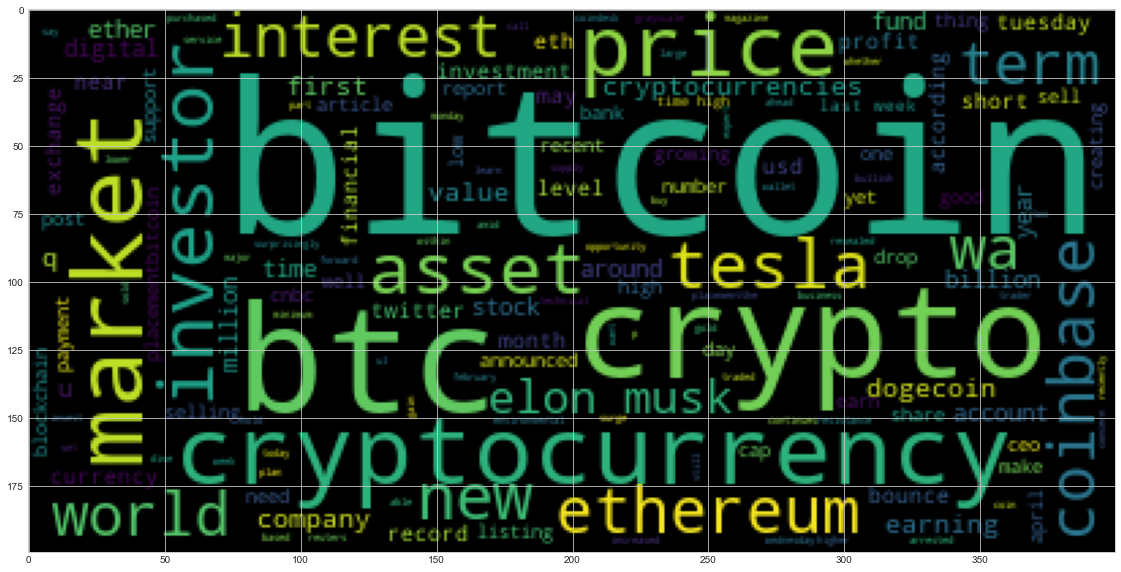

In [26]:
# Generate the Bitcoin word cloud
generate_wordcloud(btc_df)

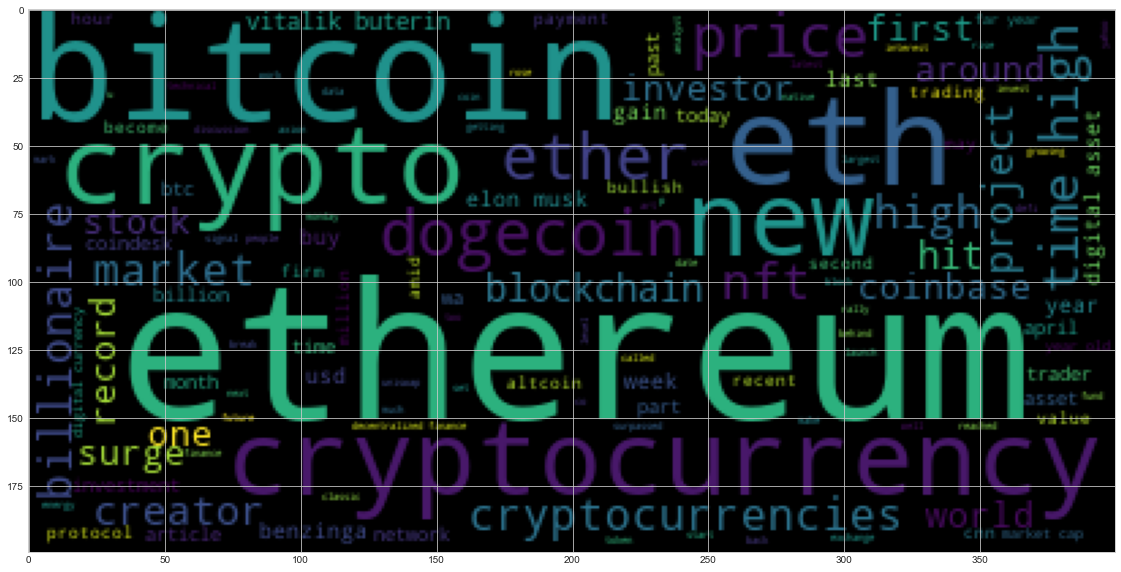

In [27]:
# Generate the Ethereum word cloud
generate_wordcloud(eth_df)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df.Text.str.cat()

In [32]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [34]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Venmo',
 'Tuesday',
 'Venmo',
 'Four',
 'Bitcoin, Ethereum',
 'more than 25%',
 'Bitcoin',
 'List PlacementBitcoin',
 '47,000',
 'two-month',
 'April 25',
 'Coinbase',
 'above $2,500',
 'Andrew Yang',
 'Bradley Tusk',
 'PlacementBitcoin',
 'hundreds',
 'US',
 'this year',
 'CNBC',
 'Wednesday',
 'NYDIG',
 'Fidelity National Information Services',
 'U.S.',
 'Tuesday',
 'Roman Sterlingov',
 'Bitcoin Fog',
 'Ethereum',
 'two',
 '2021',
 'the years',
 'Coinbase',
 'Exodus',
 'Below',
 'BTC',
 'Justin Chuh',
 'Wave Financial',
 '2021',
 'Short-Lived Highs Bitcoin',
 'Jalopnik',
 'Monday',
 'Tesla',
 'Q1 2021',
 'quarterly',
 'this quarter',
 'PlacementHSBC',
 'MicroStrategy',
 'InvestDirect',
 'March 29',
 'Reuters',
 'List PlacementThe Securities and Exchange Commission',
 'Wednesday',
 'VanEck',
 'US',
 'first',
 'PlacementBitcoin',
 'two-month',
 'Tuesday',
 "Elon Musk's",
 '2017',
 'Coinbase',
 'April 14',
 'Twitter',
 'Elon Musk',
 'Saturday Night Live',
 'Saturday',
 'this year',
 '

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
eth_text = eth_df.Text.str.cat()

In [36]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)
# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [38]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['CryptoPunks',
 'one',
 'NFT',
 'Meebits',
 '20,000',
 '3D',
 'Ethereum',
 'Venmo',
 'Tuesday',
 'Venmo',
 'Four',
 'Bitcoin, Ethereum',
 'PlacementBitcoin',
 'Ethereum',
 'two',
 '2021',
 '27-year-old',
 'Ethereum',
 'Vitalik Buterin',
 '350%',
 'Buterin',
 'Twitter',
 '2018',
 'PlacementEther',
 'above $2,400',
 'Thursday',
 '$100 billion',
 'Ethereum',
 '47,000',
 'two-month',
 'April 25',
 'Coinbase',
 'above $2,500',
 'Ethereum',
 'PlacementEther',
 'as much as 8.5%',
 'Thursday',
 'above $2,560',
 '$300 billion',
 'first',
 'second',
 '2,591',
 'Ethereum',
 'above $3,000',
 'Monday',
 'this year',
 '6%',
 'around $3,142',
 'this year',
 'America',
 'Ethereum',
 'DeFi',
 'Bitcoin',
 'weekly',
 'CoinShares',
 'Monday',
 'the kilowatt-hour',
 'one',
 'about 12 cents',
 'US',
 'kilowatt-hours',
 'Europe',
 '2016',
 'Ethereum, Polkadot',
 'SatoshiPay',
 'Snowden',
 'NFT',
 'yesterday',
 'ETH',
 '3000',
 '2015',
 'David Grider',
 'first',
 'more than 25%',
 'Bitcoin',
 "last week's",


---